In [0]:
!curl -o breast_cancer.data https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19889  100 19889    0     0  43712      0 --:--:-- --:--:-- --:--:-- 43616


In [0]:
!ls

breast_cancer.data  sample_data


In [0]:
import pandas as pd
df = pd.read_csv('breast_cancer.data', sep=',', 
                  names=["id", "clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nuclei" \
                        , "mitoses", "class"])

In [0]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split

In [0]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [0]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [0]:
clf = svm.SVC()

In [0]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9785714285714285


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [0]:
class Support_Vector_Machine:
  def __init__(self, visualization=True):
    self.visualization = visualization
    self.colors = {1:'r', -1:'b'}
    if self.visualization:
      self.fig = plt.figure()
      self.ax = self.fig.add_subplot(1,1,1)
  
  #train
  def fit(self, data):
    self.data = data
    #{ ||w||: [w,b] }
    opt_dict = {}
    transforms = [[1,1],
                 [1,-1],
                 [-1,-1],
                 [-1,1]]
    all_data = []
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    
    self.max_feature_value = max(all_data)
    self.min_feature_value = min(all_data)
    all_data = None
    
    step_sizes = [self.max_feature_value * 0.1,
                 self.max_feature_value * 0.01,
                 self.max_feature_value * 0.001]
    
    b_range_multiple = 5
    b_multiple = 5
    latest_optimum = self.max_feature_value * 10
    
    for step in step_sizes:
      w = np.array([latest_optimum, latest_optimum])
      optimized = False
      while not optimized:
        for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                          self.max_feature_value*b_range_multiple,
                          step*b_multiple):
          for transformation in transforms:
            w_t = w*transformation
            found_option = True
            for i in self.data:
              for xi in self.data[i]:
                yi = i
                if not yi*(np.dot(w_t,xi)+b) >= 1:
                  found_option = False
                  
            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [w_t,b]
              
        if w[0] < 0:
          optimized = True
          print('Optimized a step.')
        else:
          w = w - step
          
    norms = sorted([n for n in opt_dict])
    opt_choice = opt_dict[norms[0]]
    
    self.w = opt_choice[0]
    self.b = opt_choice[1]
    latest_optimum = opt_choice[0][0]+step*2
                  
        
        
 

  def predict(self, features):
    # sign( x.w+b)
    classification = np.sign(np.dot(np.array(features), self.w)+self.b)
    if classification !=0 and self.visualization:
      self.ax.scatter(feaures[0], features[1], s=200, marker='*', c=self.colors[classification])
    return classification
  
  def visualize(self):
    [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    
    def hyperplane(x,w,b,v):
      return (-w[0]*x-b+v) / w[1]
  
    datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]
  
    # w.x + b = 1
    # pos sv hyperplane
    psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
  
    # w.x + b = -1
    # negative sv hyperplane
    nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
    nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

    # w.x + b = 0
    # decision
    db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")

    plt.show()
    
      

In [0]:
data_dict = {-1:np.array([[1,7],
                        [2,8],
                        [3,8]]), 
            1:np.array([[5,1],
                       [6,-1],
                       [7,3]])}

Optimized a step.
Optimized a step.
Optimized a step.


NameError: ignored

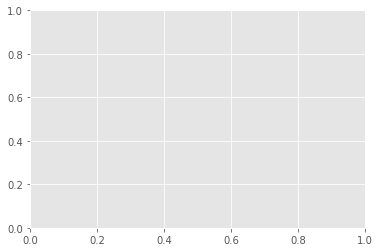

In [0]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()